## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함.

단순히 RSS를 최소화하는 것에 초점을 두면 안됨. 과적합을 방지하기 위해 회귀 계수값이 커지지 않도록 조절하여 균형을 이루어야 함.

비용 함수 목표 = Min(RSS(W) 十 alpha * |W|) 하는 W 벡터 찾는 것. alpha는 어떤 역할?

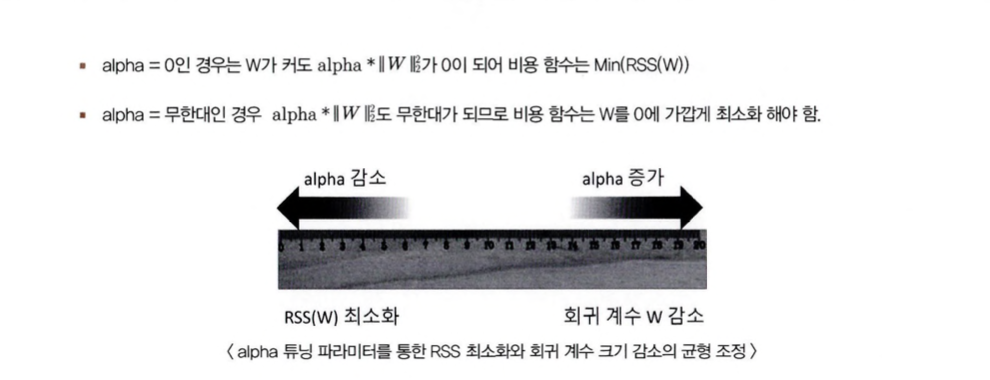


이처럼 비용함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)이라 함.

규제는 크게 L1 규제(W 절댓값에 패널티를 부여하는 방식. 라쏘회귀), L2 규제(W 제곱에 패널티를 부여하는 방식. 릿지회귀) 방식이 있음. 

## 릿지 회귀(Ridge)

Ridge 클래스를 통해 구현, 주요 파라미터는 alpha(L2 규제). 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.

feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

bostonDF = pd.DataFrame(boston, columns = feature_names)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3,random_state = 156)

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:',np.round(neg_mse_scores),3)
print('5 folds 의 개별 RMSE scores:',np.round(rmse_scores),3)
print('5 folds 의 평균 RMSE scores {:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-11. -24. -28. -75. -29.] 3
5 folds 의 개별 RMSE scores: [3. 5. 5. 9. 5.] 3
5 folds 의 평균 RMSE scores 5.518


In [17]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1,10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} ' .format(alpha, avg_rmse))
## alpha가 100일떄 평균 RMSE가 가장 좋음

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


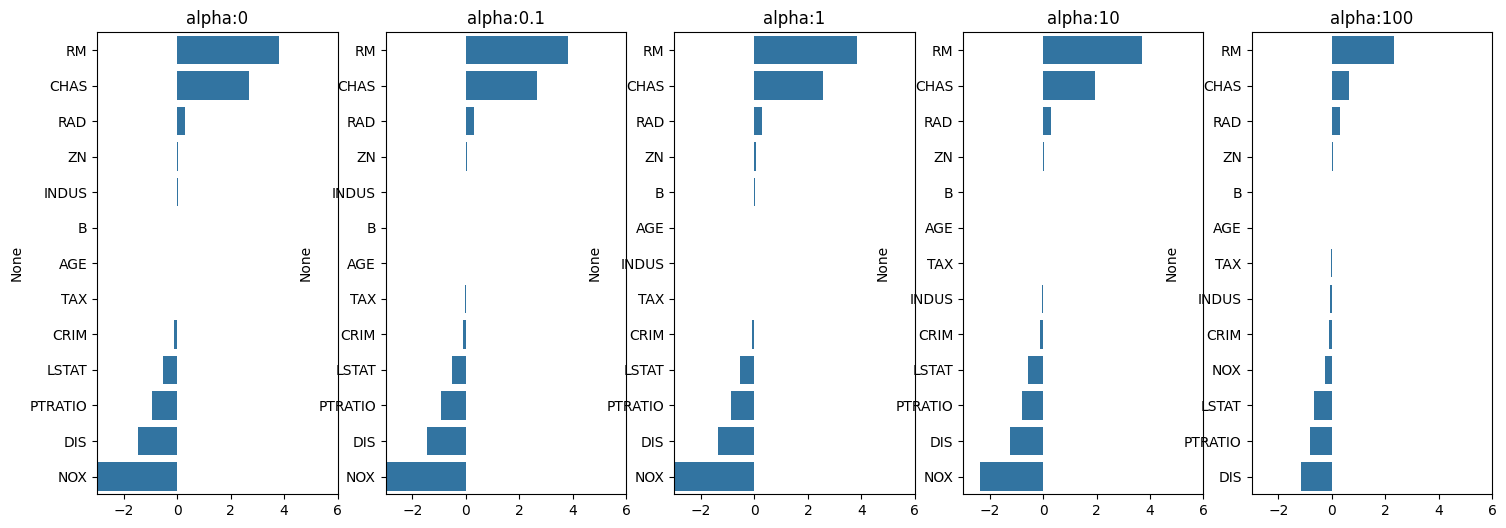

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos,alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data,y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시 
plt.show()

In [22]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

## alpha 값이 증가함에 따라 회귀 계수가 지속적으로 작아짐. 하지만 회귀계수를 0으로 만들지는 않음

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 라쏘 회귀(Lasso)
W의 절댓값에 패널티를 부여하는 L1 규제를 선형회귀에 적용한 것이 라쏘 회귀. 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거함. 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있음

In [41]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose: print('#######',model_name,'#######')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} ' .format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n , y_target_n) 
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns ) 
            colname ='alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [29]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval 함수 호출
lasso_alphas = [0.07,0.1,0.5,1,3,]
coeff_lasso_df = get_linear_reg_eval(model_name = 'Lasso',params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [32]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

## alpha의 크기가 커짐에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀜. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있음

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## 엘라스틱넷 회귀

엘라스틱넷은 L1 규제와 L2 규제를 결합한 회귀. 

엘라스틱넷 회귀 비용함수의 목표는 RSS(W)十 alpha2 * ||W||^2 十 alpha1 * ||W|| 식을 최소화하는 W를 찾는 것.

라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강함. 엘라스틱넷은 alpha 값에 따라 회귀계수의 값이 급격하게 변할 수 있는데 이를 완화하기 위해 L2 규제를 라쏘회귀에 추가함. 단점은 L1 규제와 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 점.

ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의 alpha값과는 다름. alpha = a + b (a * L1 + b * L2). l1_ratio = a/(a + b). a == 0 -> L2 규제와 동일. 

In [35]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

## alpha가 0.5일때 가장 좋은 예측 성능 보이고 있음

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [36]:
# 반환된 coeff_elastic_df를 첫 번쨰 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

## alpha 값들에 따른 피처들의 회귀 계수 값들이 라쏘보다는 상대적으로 0이 되는 값이 적음

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 선형 회귀 모델을 위한 데이터 변환
선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포(즉 평균을 중심으로 종 모양으로 데이터 값이 분포된 형태) 형태를 매우 선호

타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높음

**선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적**

1. StandardScaler 클래스를 이용해 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행

2. 1번 방법을 통해 예측 성능 향상이 없다면, 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환

3. 원래 값에 로그 변환(log transformation)을 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨. 선형 회귀에서 많이 활용. 타깃값 로그 변환 활용.

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정 
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음.
def get_scaled_data(method = None, p_degree = None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'log': 
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)
    return scaled_data
    

In [43]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 포준정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scaled_methods = [(None,None),('Standard',None),('Standard',2),('MinMax',2),('log',None)]
for scaled_method in scaled_methods:
    X_data_scaled = get_scaled_data(method = scaled_method[0],p_degree = scaled_method[1],input_data = X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scaled_method[0], scaled_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False, return_coeff = False)

## 로그 변환 


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:log, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.770 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.676 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 4.836 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.241 


## 로지스틱 회귀

선형회귀 방식을 분류에 적용한 방식

회귀가 선형인가 비선형인가는 독립변수가 아닌 가중치 변수가 선형인지 아닌지를 따름. 

로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(Sigmoid) 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정함.

사이킷런은 로지스틱 회귀를 위해서 LogisticRegression 클래스를 제공한다. 이 클래스에서 **solver 파라미터**를 통해 최적화를 선택 할 수 있다.

* lbfgs : 메모리 공간을 절약할 수 있고, CPU 코어 수가 많다면 최적화 병렬로 수행할 수 있음.
* liblinear :  다차원이고 작은 데이터 세트에서 효과적으로 동작하지만 국소 최적화(Local Minimum)에 이슈가 있고. 병렬로 최적화할 수 없음.
* newton-cg : 좀 더 정교한 최적화를 가능하게 함, 대용량의 데이터에서 속도가 많이 느려짐
* sag : Stochastic Average Gradient로서 경사 하강법 기반의 최적화 적용. 대용량의 데이터에서 빠르게 최적화 가능.
* saga : sag와 유사한 방식이며, L1 정규화 가능하게 해줌

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train,X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression() # solver = 'lbfgs'
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test,lr_preds), roc_auc_score(y_test,lr_preds_proba)))

accuracy: 0.977, roc_auc: 0.995


In [50]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver = solver)
    lr_clf.fit(X_train,y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]
    # accuracy와 roc_auc 측정
    print('solver:{0}, acc니racy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,accuracy_score(y_test, lr_preds),roc_auc_score(y_test , lr_preds_proba)))


solver:lbfgs, acc니racy: 0.977, roc_auc:0.995
solver:liblinear, acc니racy: 0.982, roc_auc:0.995
solver:newton-cg, acc니racy: 0.977, roc_auc:0.995
solver:sag, acc니racy: 0.982, roc_auc:0.995
solver:saga, acc니racy: 0.982, roc_auc:0.996


/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


penalty C.

penalty : l1, l2

C = 1 / alpha. 작을수록 규제 강도가 큼

L1, L2 규제의 경우 solver 설정에 따라 영향을 받음. Liblinear, saga의 경우 L1, L2 규제가 모두 가능하지만 lbfgs, newton-cg, sag의 경우는 L2 규제만 가능

In [54]:
from sklearn.model_selection import GridSearchCV

params = {'solver' : ['liblinear','lbfgs'],
          'penalty' : ['l2', 'l1'],
          'C' : [0.01, 0.1, 1, 5, 10]
         } 

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/kileylee/anaconda3/lib/p

## 회귀 트리

다만 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있는데, 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산.

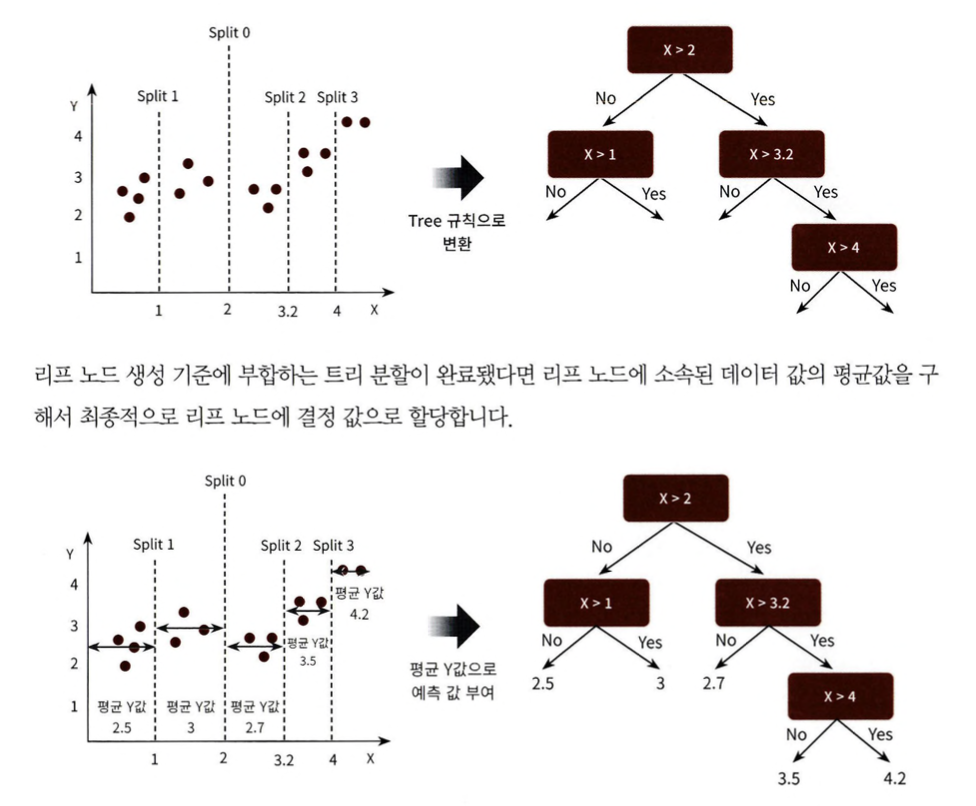

결정트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 와 같은 트리 기반 알고리즘은 CART(Classification and Regression Trees)기반하고 있기 때문에 분류 뿐만 아니라 회귀도 가능.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 보스턴 데이터 세트 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
bostonDF = pd.DataFrame(boston, columns = feature_names)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))


5 교차 검증의 개별 Negative MSE scores: [ -7.9  -13.03 -20.59 -46.21 -18.84]
5 교차 검증의 개별 RMSE scores :  [2.81 3.61 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.419


In [58]:
def get_model_cv_prediction(model, X_data, y_target) :
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#####', model.__class__.__name__, '#####')
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators =  1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000,verbose = -1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models :
  get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE : 4.419
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.269
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.251
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE : 4.646


회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식으로 회귀 계수를 제공하는 coef_ 속성이 없음. feature_importances_를 이용해 피처별 중요도 확인.

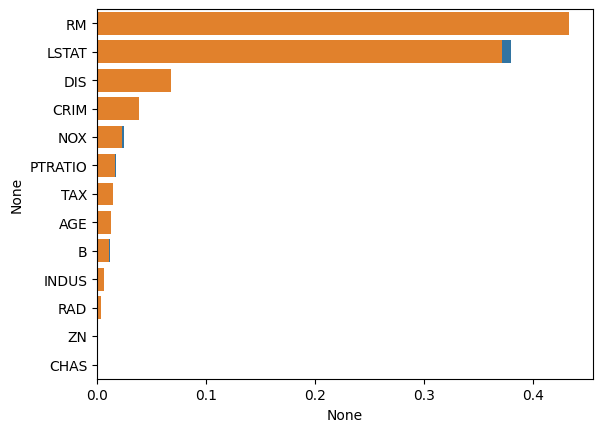

In [65]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x= feature_series, y=feature_series.index)
plt.show()

(100, 2)


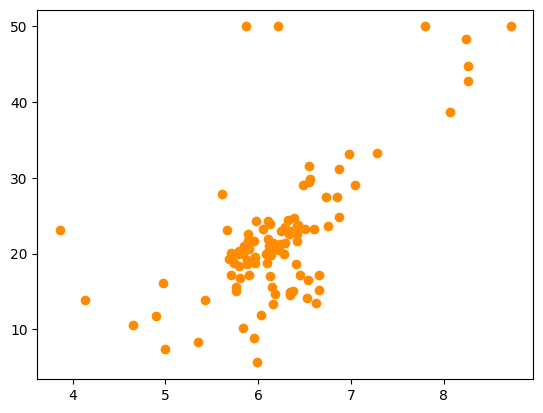

In [66]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n = 100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
plt.show()

In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_dapth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

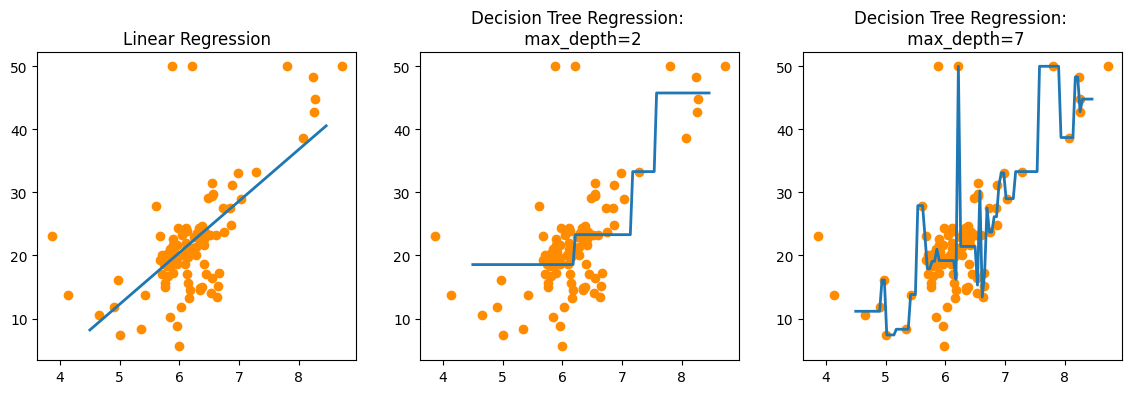

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X 축 값을 4.5 ~ 8.5로 변환하며 입력했을 떄 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax1.plot(X_test, pred_lr, label = 'linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 떄 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax2.plot(X_test, pred_rf2, label = 'max_depth:3', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax3.plot(X_test, pred_rf7, label = 'max_depth:7', linewidth = 2)

plt.show()